In [3]:
import os
import glob
import sys
import keras
import json
from scipy import misc
import numpy as np
from utils import scoring_utils
from utils import data_iterator
from utils import plotting_tools 
from utils import model_tools

In [4]:
config = json.load(open('./keras_model/config_fcn.json'))
model = keras.models.model_from_json(config)
model.load_weights('./keras_model/fcn_weights.h5')

In [5]:
def eval_dir(name):
    sample_eval = './datasets/sample_evaluation_data'
    output_dir = './evaluation/fc_baseline'
    return os.path.join(sample_eval, name), os.path.join(output_dir, name)

In [7]:
val_with_targ, pred_with_targ = model_tools.tf_pred(model, *eval_dir('patrol_with_targ')) 
val_no_targ, pred_no_targ = model_tools.tf_pred(model, *eval_dir('patrol_non_targ'))
val_following, pred_following = model_tools.tf_pred(model, *eval_dir('following_images'))

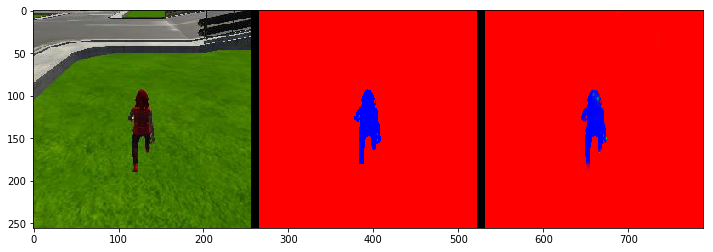

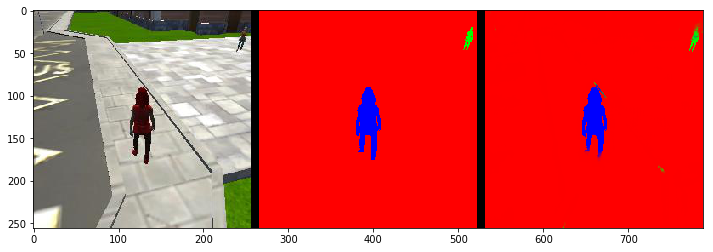

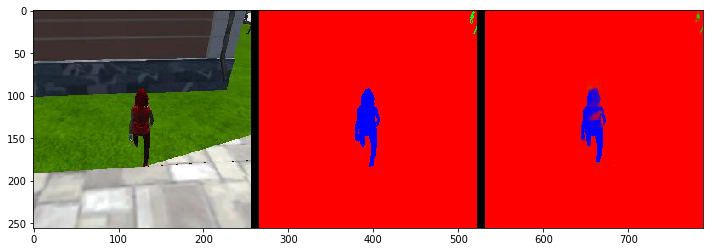

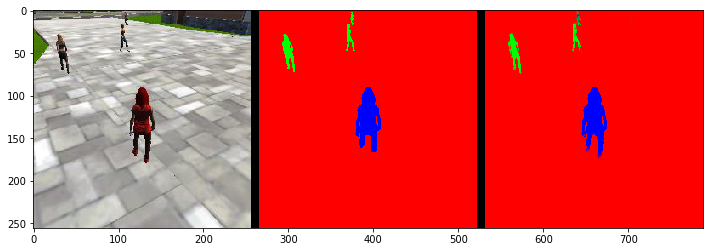

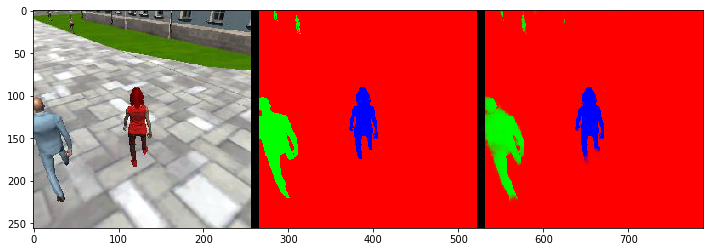

In [8]:
im_files = plotting_tools.tf_sample(
    './datasets/sample_evaluation_data','following_images', './evaluation/fc_baseline/') 
for i in range(5):
    im_tuple = plotting_tools.load_images(im_files[i])
    plotting_tools.show_images(im_tuple)

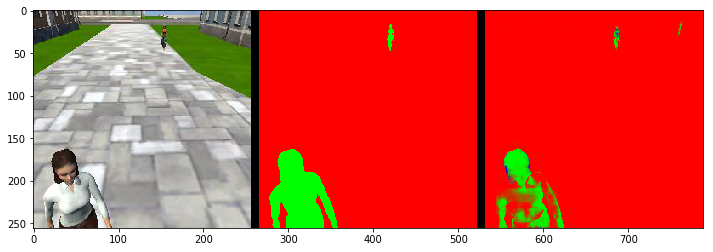

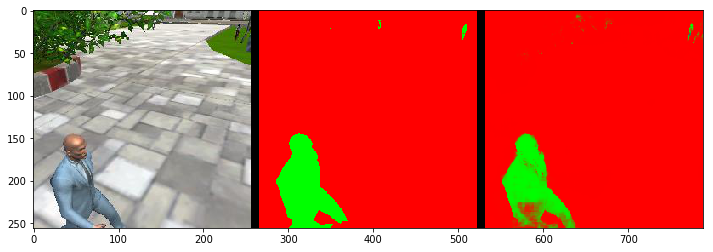

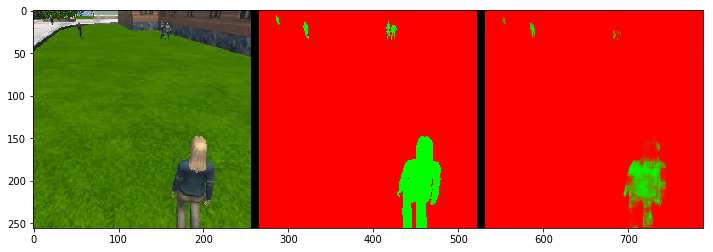

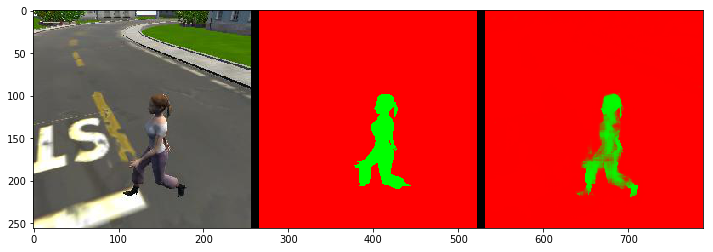

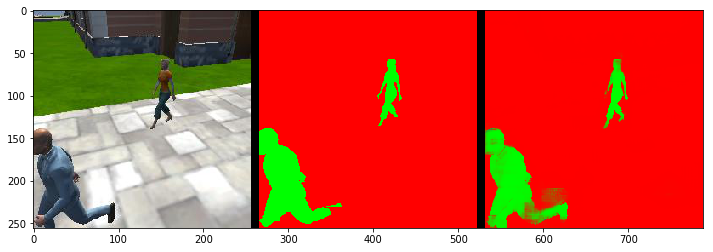

In [9]:
# images while at patrol without target
im_files = plotting_tools.tf_sample(
    './datasets/sample_evaluation_data','patrol_non_targ', './evaluation/fc_baseline/') 
for i in range(5):
    im_tuple = plotting_tools.load_images(im_files[i])
    plotting_tools.show_images(im_tuple)

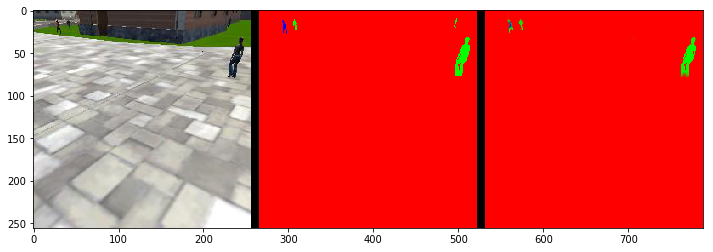

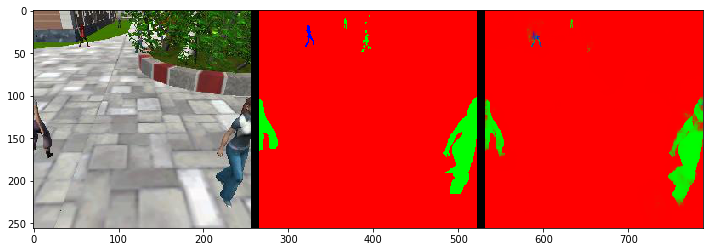

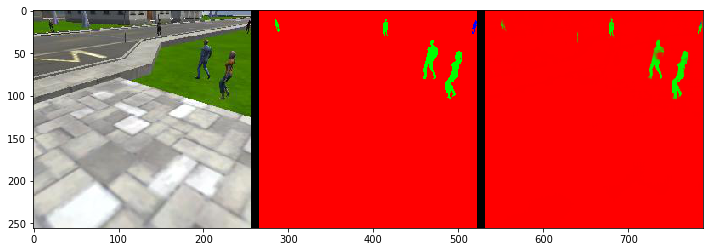

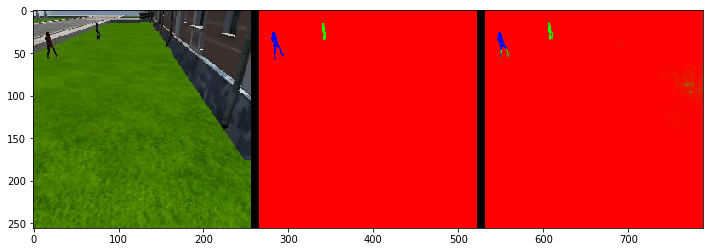

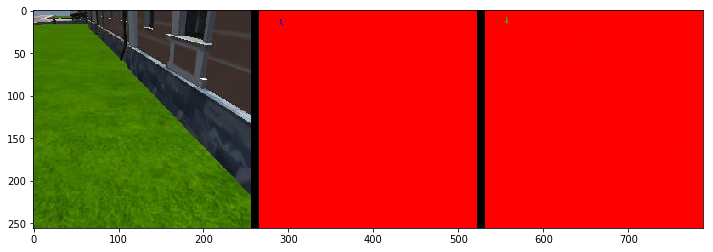

In [10]:
# images while at patrol with target
im_files = plotting_tools.tf_sample(
    './datasets/sample_evaluation_data','patrol_with_targ', './evaluation/fc_baseline/') 
for i in range(5):
    im_tuple = plotting_tools.load_images(im_files[i])
    plotting_tools.show_images(im_tuple)

## Evaluation <a id='evaluation'></a>
Evaluate your model! The following cells include several different scores to help you evaluate your model under the different conditions discussed during the Prediction step. 

In [11]:
# Scores for while the quad is following behind the target. 
true_pos1, false_pos1, false_neg1, iou1 = scoring_utils.score_run_iou(val_following, pred_following)

number of validation samples intersection over the union evaulated on 542
average intersection over union for background is 0.9961246444178526
average intersection over union for other people is 0.3912140610244765
average intersection over union for the hero is 0.9033366369438782
number true positives: 539, number false positives: 0, number false negatives: 0


In [12]:
# Scores for images while the quad is on patrol and the target is not visable
true_pos2, false_pos2, false_neg2, iou2 = scoring_utils.score_run_iou(val_no_targ, pred_no_targ)

number of validation samples intersection over the union evaulated on 270
average intersection over union for background is 0.9891854269882701
average intersection over union for other people is 0.7812086658156747
average intersection over union for the hero is 0.0
number true positives: 0, number false positives: 100, number false negatives: 0


In [13]:
# This score measures how well the neural network can detect the target from far away
true_pos3, false_pos3, false_neg3, iou3 = scoring_utils.score_run_iou(val_with_targ, pred_with_targ)

number of validation samples intersection over the union evaulated on 322
average intersection over union for background is 0.996806223364136
average intersection over union for other people is 0.5028202789774424
average intersection over union for the hero is 0.33496517014553706
number true positives: 207, number false positives: 1, number false negatives: 105


In [14]:
# Sum all the true positives, etc from the three datasets to get a weight for the score
true_pos = true_pos1 + true_pos2 + true_pos3
false_pos = false_pos1 + false_pos2 + false_pos3
false_neg = false_neg1 + false_neg2 + false_neg3

weight = true_pos/(true_pos+false_neg+false_pos)
print(weight)

0.7836134453781513


In [15]:
# The IoU for the dataset that never includes the hero is excluded from grading
final_IoU = (iou1 + iou3)/2
print(final_IoU)

0.619150903545


In [16]:
# And the final grade score is 
final_score = final_IoU * weight
print(final_score)

0.485174972736
